# ***Job Recommendation System using Python***
# Let’s start the task of creating a job recommendation system by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("/content/jobs.csv")
print(data.head())

   Unnamed: 0                    Job Salary Job Experience Required  \
0           0   Not Disclosed by Recruiter               5 - 10 yrs   
1           1   Not Disclosed by Recruiter                2 - 5 yrs   
2           2   Not Disclosed by Recruiter                0 - 1 yrs   
3           3       2,00,000 - 4,00,000 PA.               0 - 5 yrs   
4           4   Not Disclosed by Recruiter                2 - 5 yrs   

                                          Key Skills  \
0                      Media Planning| Digital Media   
1   pre sales| closing| software knowledge| clien...   
2   Computer science| Fabrication| Quality check|...   
3                                  Technical Support   
4   manual testing| test engineering| test cases|...   

                                Role Category  \
0                                 Advertising   
1                                Retail Sales   
2                                         R&D   
3  Admin/Maintenance/Security/Datawareho

# The dataset has an unnamed column. Let’s remove it and move further:

In [2]:
data = data.drop("Unnamed: 0",axis=1)

# Now let’s have a look if the dataset contains any null values or not:

In [3]:
data.isnull().sum()

Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
Job Title                  1
dtype: int64

# As the dataset doesn’t have any null values, let’s move further by exploring the skills mentioned in the Key Skills column:

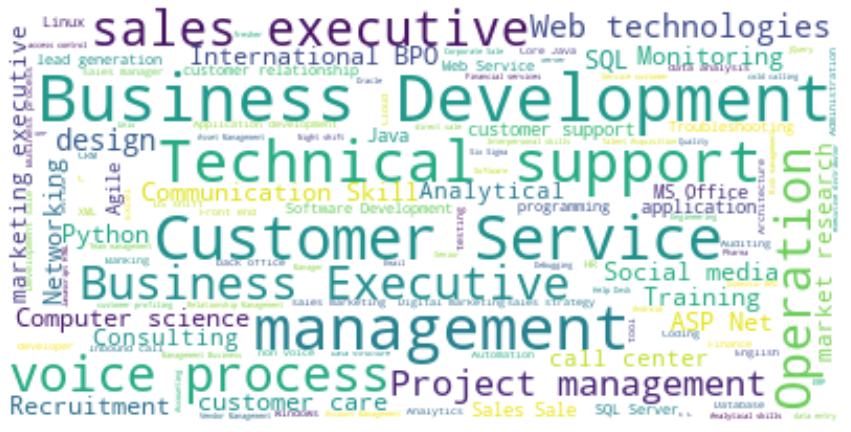

In [4]:
text = " ".join(i for i in data["Key Skills"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now let’s have a look at the functional areas mentioned in the dataset:

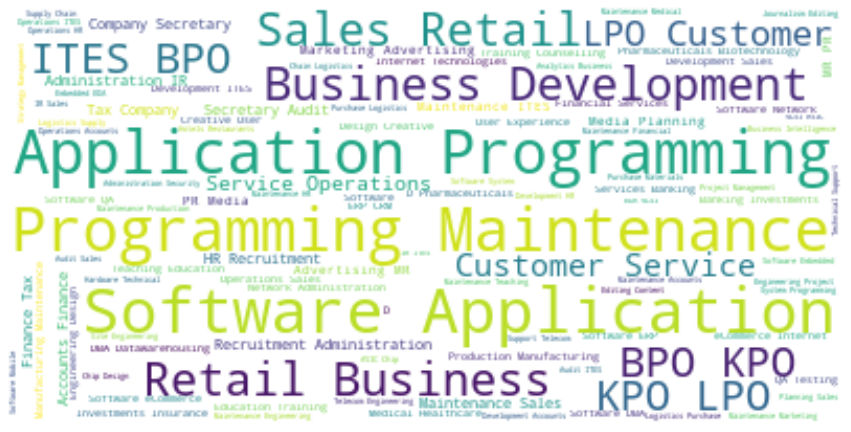

In [5]:
text = " ".join(i for i in data["Functional Area"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now let’s have a look at the job titles mentioned in the dataset:

In [ ]:
text = " ".join(i for i in data["Job Title"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

# ***Creating a Content-Based Recommendation System***
# Now let’s move forward by creating a job recommendation system. The Key Skills column in the dataset contains the skills required for the job role. We can use the Key Skills column to recommend jobs to the users. So here’s how we can use the cosine similarity algorithm to create a similarity matrix from the Key Skills column:

In [9]:
from sklearn.feature_extraction import text
feature = data["Key Skills"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

# Now I will set the Job title column as the index of the dataset so that the users can find similar jobs according to the job they are looking for:

In [10]:
indices = pd.Series(data.index, index=data['Job Title']).drop_duplicates()

# Now here’s how to write a function to recommend jobs according to the skills required for the job role:

In [11]:
def jobs_recommendation(Title, similarity = similarity):
    index = indices[Title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[::], reverse=True)
    similarity_scores = similarity_scores[0:5]
    newsindices = [i[0] for i in similarity_scores]
    return data[['Job Title', 'Job Experience Required', 
                 'Key Skills']].iloc[newsindices]

print(jobs_recommendation("Software Developer"))

                                       Job Title Job Experience Required  \
3453                          Software Developer               1 - 6 yrs   
3452                    Team Lead/Technical Lead             4 - 6 Years   
3451  Associate/Senior Associate -(NonTechnical)               0 - 1 yrs   
3450                             System Security               0 - 4 yrs   
3449  Associate/Senior Associate -(NonTechnical)               0 - 5 yrs   

                                             Key Skills  
3453   Javascript| Linux| Automation| Python| VMware...  
3452  ISERIES|AS400|Identity Access Management|Infor...  
3451                                   Customer support  
3450   malware analysis| Data analysis| PDF| cyber s...  
3449   BPO| Customer Support| Customer Service| Cust...  


# ***by - subhanshu tripathi***